In [14]:
#CONVOLUTIONAL NEURAL NETWORKS (BNN COMES LATER)

#Import MINST data

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


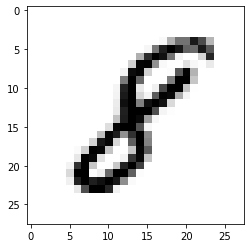

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

image_index = 7777

#The label
print(y_train[image_index])

#The image
plt.imshow(x_train[image_index], cmap='Greys')

In [16]:
#We also need to know the shape of the dataset to channel it to the convolutional
# neural network
x_train.shape

(60000, 28, 28)

In [17]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [20]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

#We may experiment with any number for the first Dense layer;
#however, the final Dense layer must have 10 neurons since we
#have 10 number classes (0, 1, 2, …, 9). You may always experiment
#with kernel size, pool size, activation functions, dropout rate,
#and number of neurons in the first Dense layer to get a better result.

In [21]:
#With the above code, we created an non-optimized empty CNN. 
#Now it is time to set an optimizer with a given loss function 
#which uses a metric. Then, we can fit the model by using our 
#train data.

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

#You can also set batch_size for the fit

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2074 - acc: 0.9378
Epoch 2/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0860 - acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0580 - acc: 0.9820
Epoch 4/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0443 - acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.0356 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0289 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0249 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0222 - acc: 0.9927
Epoch 9/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0203 - acc: 0.9929
Epoch 10/10
60000/60000 [================

In [22]:
#Evaluating the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0642 - acc: 0.9850


[0.06416861503745228, 0.985]

9


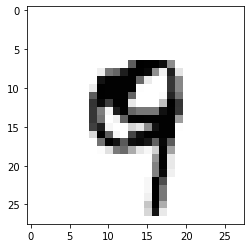

In [23]:
#An example prediction
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

### Simple NN

In [24]:
# define the keras model
model2 = Sequential()
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(128,activation=tf.nn.relu))
model2.add(Dense(10,activation=tf.nn.softmax))

#compile
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model2.fit(x=x_train,y=y_train, epochs=9)

#Evaluating the model
model2.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/9
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2589 - acc: 0.9256
Epoch 2/9
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1166 - acc: 0.96520s - loss: 0.1187 - ac
Epoch 3/9
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0790 - acc: 0.9761
Epoch 4/9
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0605 - acc: 0.98090s - loss: 0.0596 - acc: 
Epoch 5/9
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0454 - acc: 0.9861
Epoch 6/9
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0362 - acc: 0.9888
Epoch 7/9
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0292 - acc: 0.99091s
Epoch 8/9
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0245 - acc: 0.9919
Epoch 9/9
10000/10000 [==============================] - 0s 22us/sample - loss: 0.0813 - acc: 0.9765


[0.08129265486844524, 0.9765]

5


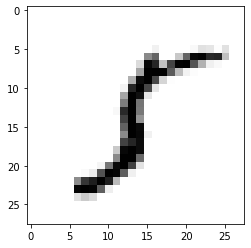

In [25]:
#An example prediction
image_index = 4152
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred2 = model2.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred2.argmax())

### BAYESIAN NEURAL NETWORKS

Instead of point estimate of weights, BNN approximates the distribution of weights, commonly a Gaussian/normal distribution with two hyperparameters (mean and standard deviation), based on prior information and data.

BNN can be integrated into any neural network models, but here I’m interested in its application on convolutional neural networks (CNN).

In [26]:
# Load libriaries and functions.
import pandas as pd
import numpy as np
import tensorflow as tf
tfk = tf.keras
tf.keras.backend.set_floatx("float64")
import tensorflow_probability as tfp
tfd = tfp.distributions
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Define helper functions.
scaler = StandardScaler()
detector = IsolationForest(n_estimators=1000, behaviour="deprecated", contamination="auto", random_state=0)
neg_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

In [27]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

n_epochs = 20
n_samples = x_train.shape[0]
n_batches = 10
batch_size = np.floor(n_samples/n_batches)
buffer_size = n_samples

# Define prior for regularization.
prior = tfd.Independent(tfd.Normal(loc=tf.zeros(10, dtype=tf.float64), scale=1.0), reinterpreted_batch_ndims=1)


# Define model instance.

model3 = tfk.Sequential([
tfk.layers.Flatten(input_shape=input_shape, name="input"),
tfk.layers.Dense(28, activation="relu", name="dense_1"),
tfk.layers.Dense(tfp.layers.MultivariateNormalTriL.params_size(
10), activation=None, name="distribution_weights"),
tfp.layers.MultivariateNormalTriL(10, activity_regularizer=tfp.layers.KLDivergenceRegularizer(prior, weight=1/n_batches), name="output")
], name="model")



# Compile model.
model3.compile(optimizer="adam", loss=neg_log_likelihood, metrics=['accuracy'])

# Run training session.
model3.fit(x=x_train, y=y_train, epochs=n_epochs, verbose=True)

# Describe model.
model3.summary()

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/sample - loss: 16.2701 - acc: 0.2336s - loss: 16.4453 - acc
Epoch 2/20
60000/60000 [==============================] - 5s 84us/sample - loss: 12.5530 - acc: 0.2125
Epoch 3/20
60000/60000 [==============================] - 5s 84us/sample - loss: 11.7336 - acc: 0.1413
Epoch 4/20
60000/60000 [==============================] - 4s 68us/sample - loss: 11.6498 - acc: 0.0703s - loss: 11.7630 - acc: 
Epoch 5/20
60000/60000 [==============================] - 4s 68us/sample - loss: 9.2071 - acc: 0.0938
Epoch 6/20
60000/60000 [==============================] - 4s 69us/sample - loss: 11.8653 - acc: 0.1157
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 10.0002 - acc: 0.0921
Epoch 8/20
60000/60000 [==============================] - 4s 73us/sample - loss: 9.0200 - acc: 0.0671
Epoch 9/20
60000/60000 [==============================] - 5s 85us/sample - loss: 16.9758 - acc: 0.0575
Epoc

In [39]:
#Evaluating the model
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 72us/sample - loss: 7.6495 - acc: 0.0782


[7.649450236987868, 0.0782]

TypeError: Can not convert a MultivariateNormalTriL into a Tensor or Operation.

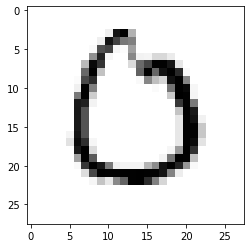

In [44]:
#An example prediction
image_index = 4329
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred3 = model3.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred3.argmax())